In [1]:
library(anytime)
library(lmerTest)
library(tidyverse)
library(report)
library(xtable)
library(LMERConvenienceFunctions)
library(lme4)
library(ez)
library(predictmeans)
library(effects)
library(ggplot2)
library(tidyr)
round_df <- function(df, digits) {
  nums <- vapply(df, is.numeric, FUN.VALUE = logical(1))

  df[,nums] <- round(df[,nums], digits = digits)

  (df)
}

apatheme=theme_bw()+
  theme(panel.grid.major=element_blank(),
        panel.grid.minor=element_blank(),
        panel.border=element_blank(),
        axis.line=element_line(color="black"),
        text=element_text(size=10), #change writing size
        #legend.title=element_blank(),
       legend.position = "top")



Loading required package: lme4

Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()

Warning message:
"package 'LMERConvenienceFunctions' was built under R version 4.2.1"
Warning message:
"package 'predictmeans' was built under R version 4.2.1"
Loading required package:

In [6]:
df <- read.csv("./adaptivedf.csv")
df$PId <- factor(df$PId)
#df$AdaptationStatus <- factor(df$AdaptationStatus)
#df$BackLevel <- df$BackLevel
#df$EDAMean<-scale(df$EDAMean)
df$EDATonic<-scale(df$EDATonic)

In [7]:
df

TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,NBackAccuracy,NBackTimePerBall,LiamsCountTotal,Flow,EDATonic,EDARaw,EDAPhasic,PId
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<fct>
1660049372,4,1,1,1660049852,480.0000,0.9451613,293,0,310,94.51613,1.548387,905,113.12500,-0.73279996,1.5882334,-4.802986e-05,1001
1660050104,2,1,1,1660050584,480.0000,0.9608939,344,0,358,96.08939,1.340782,707,88.37500,-0.76410339,1.5170382,1.655354e-05,1001
1660050846,3,1,1,1660051326,480.0000,0.9623656,358,0,372,96.23656,1.290323,1175,146.87500,-0.77178373,1.4995147,-2.318148e-05,1001
1660051574,1,1,1,1660052054,480.0000,0.9417476,291,1,310,93.87097,1.553398,198,24.75000,-0.73191068,1.5903491,4.331147e-05,1001
1660052300,5,2,1,1660052780,480.0000,0.9660057,341,1,354,96.32768,1.359773,861,107.62500,-0.83055379,1.3657345,-2.261807e-05,1001
1660119332,4,1,3,1660119812,480.0000,0.8367347,164,2,198,82.82828,2.448980,857,107.12500,0.63760233,4.7077719,-1.253512e-04,3001
1660120027,3,1,3,1660120507,480.0000,0.8050000,161,2,202,79.70297,2.400000,1193,149.12500,1.64402968,6.9994760,5.240321e-04,3001
1660120877,1,1,3,1660121357,480.0000,0.8235294,154,0,187,82.35294,2.566845,196,24.50000,1.88407357,7.5452539,-1.394780e-04,3001
1660121675,5,2,3,1660122155,480.0000,0.8167539,156,4,195,80.00000,2.513089,908,113.50000,1.66135086,7.0390594,6.771048e-04,3001


,TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,NBackAccuracy,NBackTimePerBall,LiamsCountTotal,Flow,EDATonic,EDARaw,EDAPhasic,PId
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<fct>
1,1660049372,4,1,1,1660049852,480,0.9451613,293,0,310,94.51613,1.548387,905,113.125,-0.7328000,1.588233,-4.802986e-05,1001
2,1660050104,2,1,1,1660050584,480,0.9608939,344,0,358,96.08939,1.340782,707,88.375,-0.7641034,1.517038,1.655354e-05,1001
3,1660050846,3,1,1,1660051326,480,0.9623656,358,0,372,96.23656,1.290323,1175,146.875,-0.7717837,1.499515,-2.318148e-05,1001
4,1660051574,1,1,1,1660052054,480,0.9417476,291,1,310,93.87097,1.553398,198,24.750,-0.7319107,1.590349,4.331147e-05,1001
5,1660119332,4,1,3,1660119812,480,0.8367347,164,2,198,82.82828,2.448980,857,107.125,0.6376023,4.707772,-1.253512e-04,3001
6,1660120027,3,1,3,1660120507,480,0.8050000,161,2,202,79.70297,2.400000,1193,149.125,1.6440297,6.999476,5.240321e-04,3001


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: EDATonic ~ Flow * NBackN + (1 | PId)
   Data: dfXWL

REML criterion at convergence: 38.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.89703 -0.29150 -0.06837  0.26059  1.69506 

Random effects:
 Groups   Name        Variance Std.Dev.
 PId      (Intercept) 0.5155   0.7180  
 Residual             0.1154   0.3396  
Number of obs: 16, groups:  PId, 4

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)
(Intercept) -2.155579   1.226208  2.983020  -1.758    0.178
Flow         0.000109   0.005698 10.002083   0.019    0.985
NBackN       1.221658   0.577829  2.978996   2.114    0.126
Flow:NBackN -0.001732   0.002681 10.000841  -0.646    0.533

Correlation of Fixed Effects:
            (Intr) Flow   NBackN
Flow        -0.431              
NBackN      -0.943  0.406       
Flow:NBackN  0.406 -0.942 -0.430

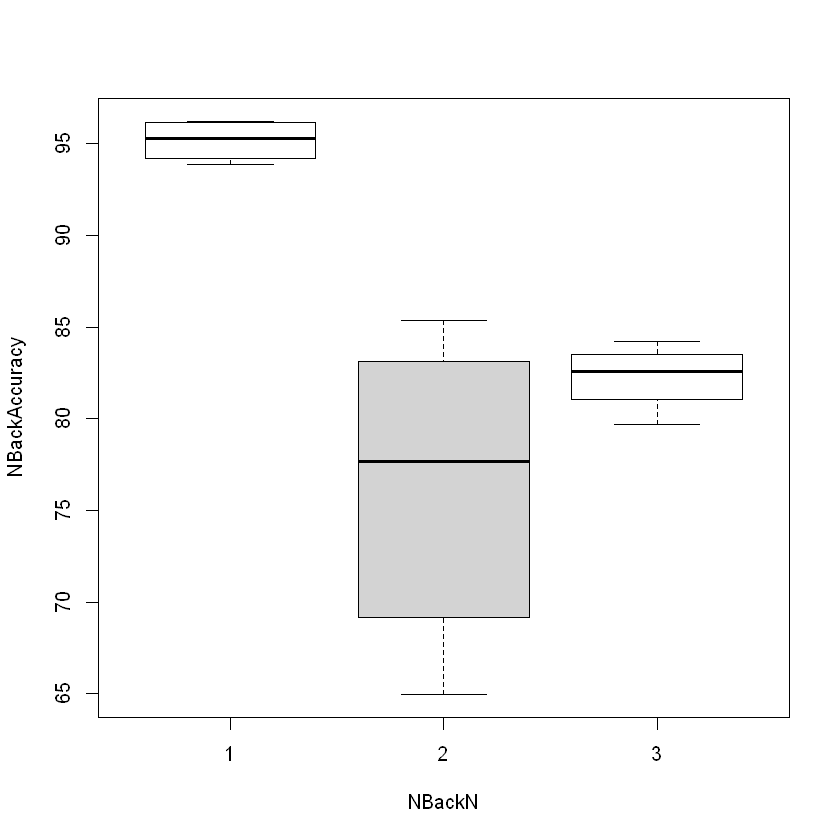

In [8]:
dfXWL <- df%>%filter(AdaptationStatus==1)
head(dfXWL)
boxplot(NBackAccuracy ~ NBackN, col=c("white","lightgray"),dfXWL)

model <- lmer(EDATonic ~ Flow*NBackN + (1|PId), data= dfXWL) #to run the model
summary(model)

In [10]:
anova(model)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Flow,4.221983e-05,4.221983e-05,1,10.002083,0.0003659822,0.9851131
NBackN,5.156514e-01,5.156514e-01,1,2.978996,4.4699192629,0.1255038
Flow:NBackN,4.814658e-02,4.814658e-02,1,10.000841,0.4173581976,0.5328013


In [11]:
var<-"NBackAccuracy"

In [12]:
t_non<-data.frame(coef(summary(model)))[2,]$t.value
p_non<-data.frame(coef(summary(model)))[2,]$Pr...t..
print(p_non)
print(t_non)

model <- lmer(EDATonic ~ Flow + NBackN + (1|PId), data= df%>%filter(AdaptationStatus==1)) #to run the model
summary(model)

x<-df%>%filter(AdaptationStatus==2)#get adaptation values

df_m<-as.data.frame(coef(model)[1])
df_m$PId<-rownames(df_m)

x<-left_join(x,df_m,by="PId")

#calculate expected values
x$intercept<-x$PId..Intercept.
x$slope<-x$PId.Flow
x$slopeNBackN<-x$PId.NBackN
x$slopelowNBackN<-x$PId.Flow.NBackN
x$expected <- predict(model, df%>%filter(AdaptationStatus==2)%>%select(PId,NBackN,Flow))
#x$expected <- x$intercept + x$slope * x$Flow + x$BackLevel * x$slopeBackLevel
# + x$slopeBackLevel* x$slopelowBackLevel + x$slopeBackLevel* x$slopelowBackLevel
x$actual<-x[,colnames(x)==var]#get actual

[1] 0.9851131
[1] 0.01913066


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: EDATonic ~ Flow + NBackN + (1 | PId)
   Data: df %>% filter(AdaptationStatus == 1)

REML criterion at convergence: 29.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.03119 -0.52964 -0.07406  0.37623  1.44088 

Random effects:
 Groups   Name        Variance Std.Dev.
 PId      (Intercept) 0.5177   0.7195  
 Residual             0.1092   0.3305  
Number of obs: 16, groups:  PId, 4

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)  
(Intercept) -1.833725   1.120382  2.095085  -1.637   0.2377  
Flow        -0.003358   0.001860 11.008795  -1.806   0.0983 .
NBackN       1.061174   0.522039  1.999979   2.033   0.1791  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
       (Intr) Flow  
Flow   -0.152       
NBackN -0.932  0.002

In [13]:
dfX <- gather(x, condition, measurement, expected:actual, factor_key=TRUE)
ezANOVA(dfX, dv= measurement, wid = PId, within= condition, between = NBackN)

Warning message:
"Converting "PId" to factor for ANOVA."
Warning message:
""NBackN" will be treated as numeric."
Warning message:
"Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA()."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2,NBackN,1,2,1.047347,0.413747996,,0.2000648
3,condition,1,2,267.240877,0.003721069,*,0.9858766
4,NBackN:condition,1,2,1.607276,0.332493374,,0.2956896


In [25]:
dfX

TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,⋯,EDAPhasic,PId,PId..Intercept.,PId.Flow,PId.NBackN,intercept,slope,slopeNBackN,condition,measurement
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1660052300,5,2,1,1660052780,480.0000,0.9660057,341,1,354,⋯,-2.261807e-05,1001,-1.514864,-0.003358404,1.061174,-1.514864,-0.003358404,1.061174,expected,-0.8151384
1660121675,5,2,3,1660122155,480.0000,0.8167539,156,4,195,⋯,6.771048e-04,3001,-1.514864,-0.003358404,1.061174,-1.514864,-0.003358404,1.061174,expected,1.2874783
1660038815,5,2,2,1660039295,480.0000,0.7168675,238,0,332,⋯,-5.778454e-04,2003,-1.615587,-0.003358404,1.061174,-1.615587,-0.003358404,1.061174,expected,0.2397676
1660134945,5,2,2,1660135425,480.0226,0.8808933,355,1,404,⋯,-2.116848e-04,2001,-2.689584,-0.003358404,1.061174,-2.689584,-0.003358404,1.061174,expected,-0.9148156
1660052300,5,2,1,1660052780,480.0000,0.9660057,341,1,354,⋯,-2.261807e-05,1001,-1.514864,-0.003358404,1.061174,-1.514864,-0.003358404,1.061174,actual,96.3276836
1660121675,5,2,3,1660122155,480.0000,0.8167539,156,4,195,⋯,6.771048e-04,3001,-1.514864,-0.003358404,1.061174,-1.514864,-0.003358404,1.061174,actual,80.0000000
1660038815,5,2,2,1660039295,480.0000,0.7168675,238,0,332,⋯,-5.778454e-04,2003,-1.615587,-0.003358404,1.061174,-1.615587,-0.003358404,1.061174,actual,71.6867470
1660134945,5,2,2,1660135425,480.0226,0.8808933,355,1,404,⋯,-2.116848e-04,2001,-2.689584,-0.003358404,1.061174,-2.689584,-0.003358404,1.061174,actual,87.8712871


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'BackLevel' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(pri

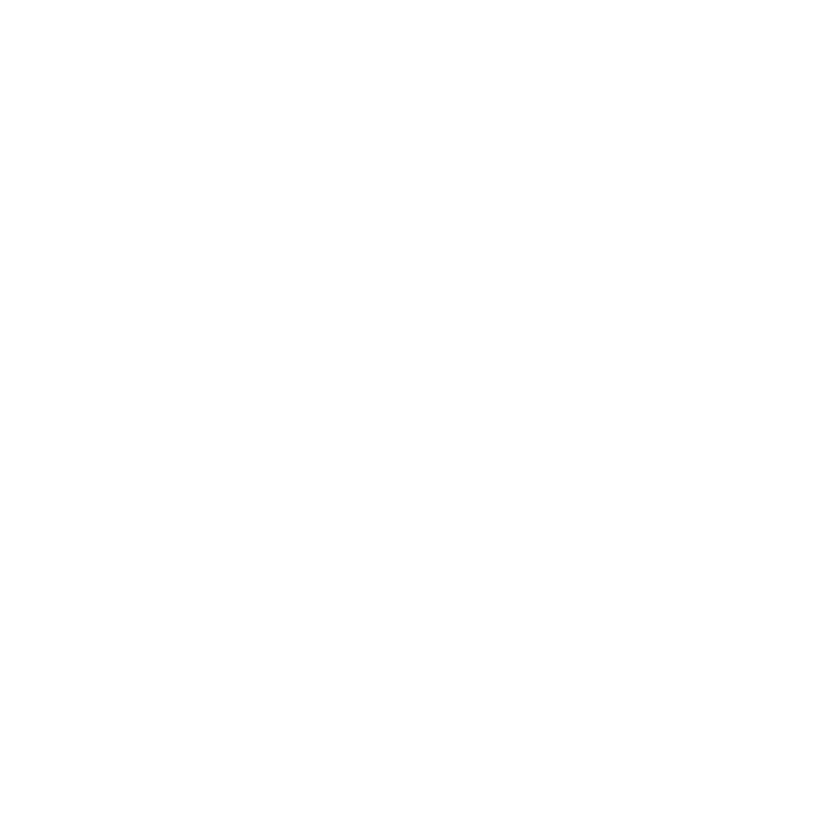

In [14]:
qplot(x = BackLevel, y = measurement, color = condition, data = dfX) +
  geom_smooth(method = "lm")

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



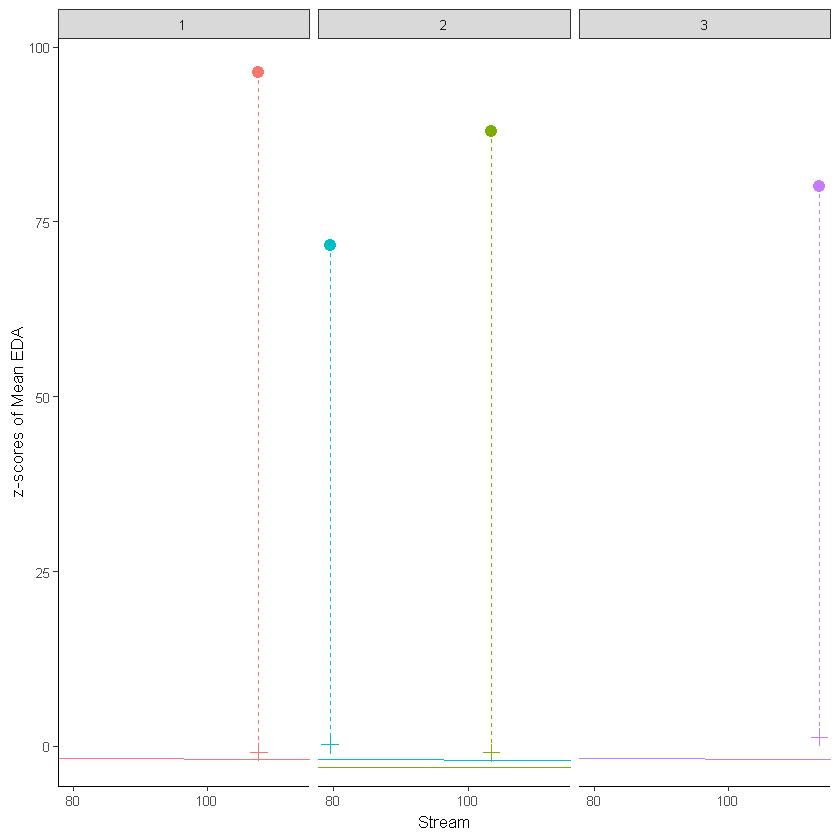

In [15]:
ggplot(x,aes(Flow,actual,group=PId,color=PId))+
geom_line(alpha=.5)+
geom_segment(data=x,aes(x = Flow, xend = Flow, y = actual, yend = expected),linetype="dashed")+
geom_point(data = x,aes(Flow,actual,color=PId),size=3)+
geom_point(data = x,aes(Flow,expected,color=PId),shape=3,size=3)+
apatheme+
theme(legend.position="None")+
ylab("z-scores of Mean EDA")+
xlab("Stream")+
scale_x_continuous(breaks=(seq(20,130,by=20)))+ 
geom_abline(aes(color = PId, intercept = intercept, slope = slope))+
facet_wrap(~NBackN)

In [17]:
model <- lmer(NBackAccuracy ~ Flow + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==1)) #to run the model
summary(model)
df1<-df%>%filter(AdaptationStatus==2, NBackN==1)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df1<-left_join(df1,dfX,by="PId")
#calculate expected values
df1$intercept<-df1$PId..Intercept.
df1$slope<-df1$PId.Flow
df1$slopeNBackN<-df1$PId.NBackN
df1$expected <- predict(model, df1%>%select(PId,Flow))
df1$actual<-df1[,colnames(df1)=="NBackAccuracy"]#get actual

model <- lmer(NBackAccuracy ~ Flow + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==2)) #to run the model
summary(model)
df2<-df%>%filter(AdaptationStatus==2, NBackN==2)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df2<-left_join(df2,dfX,by="PId")
#calculate expected values
df2$intercept<-df2$PId..Intercept.
df2$slope<-df2$PId.Flow
df2$slopeNBackN<-df2$PId.NBackN
df2$expected <- predict(model, df2%>%select(PId,Flow))
df2$actual<-df2[,colnames(df2)=="NBackAccuracy"]#get actual

model <- lmer(NBackAccuracy ~ Flow + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==3)) #to run the model
summary(model)
df3<-df%>%filter(AdaptationStatus==2, NBackN==3)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df3<-left_join(df3,dfX,by="PId")
df3$intercept<-df3$PId..Intercept.
df3$slope<-df3$PId.Flow
df3$slopeNBackN<-df3$PId.NBackN
df3$expected <- predict(model, df3%>%select(PId,Flow))
df3$actual<-df3[,colnames(df3)=="NBackAccuracy"]#get actual

x <- rbind(df1, df2)
x <- rbind(x, df3)

ERROR: Error: grouping factors must have > 1 sampled level


## Model for Random adaptation

In [21]:
t_non<-data.frame(coef(summary(model)))[2,]$t.value
p_non<-data.frame(coef(summary(model)))[2,]$Pr...t..
print(p_non)
print(t_non)

model <- lmer(EDATonic ~ Flow + NBackN + (1|PId), data= df%>%filter(BlockNumber==4)) #to run the model for Random Adaptation
summary(model)

x<-df%>%filter(AdaptationStatus==2)#get adaptation values

df_m<-as.data.frame(coef(model)[1])
df_m$PId<-rownames(df_m)

x<-left_join(x,df_m,by="PId")

#calculate expected values
x$intercept<-x$PId..Intercept.
x$slope<-x$PId.Flow
x$slopeNBackN<-x$PId.NBackN
x$slopelowNBackN<-x$PId.Flow.NBackN
x$expected <- predict(model,df%>%filter(BlockNumber==4)%>%select(PId,NBackN,Flow))
#x$expected <- x$intercept + x$slope * x$Flow + x$BackLevel * x$slopeBackLevel
# + x$slopeBackLevel* x$slopelowBackLevel + x$slopeBackLevel* x$slopelowBackLevel
x$actual<-x[,colnames(x)==var]#get actual

[1] 0.09832669
[1] -1.805863


ERROR: Error: number of levels of each grouping factor must be < number of observations (problems: PId)


In [ ]:
dfX <- gather(x, condition, measurement, expected:actual, factor_key=TRUE) #Run ANOVA on random adaptation
ezANOVA(dfX, dv= measurement, wid = PId, within= condition, between = NBackN) 

In [ ]:
ggplot(x,aes(Flow,actual,group=PId,color=PId))+
geom_line(alpha=.5)+
geom_segment(data=x,aes(x = Flow, xend = Flow, y = actual, yend = expected),linetype="dashed")+
geom_point(data = x,aes(Flow,actual,color=PId),size=3)+
geom_point(data = x,aes(Flow,expected,color=PId),shape=3,size=3)+
apatheme+
theme(legend.position="None")+
ylab("z-scores of Mean EDA")+
xlab("Stream")+
scale_x_continuous(breaks=(seq(20,130,by=20)))+ 
geom_abline(aes(color = PId, intercept = intercept, slope = slope))+
facet_wrap(~NBackN)